## ML1 LAB02 23.04.2022

## Shrimanta Satpati 21bda45

In [59]:
## SLR Model

In [60]:
!pip install folium
!pip install sidetable
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import sidetable as stb
from sklearn import linear_model
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [61]:
df = pd.read_csv("C:/Users/super/Downloads/kc_house_data/kc_house_data.csv", parse_dates = ["date"])

In [62]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [63]:
## Simple Linear Regression (SLR) model, we must have an independent variable and a dependent variable. For our SLR model, we are going to take sqft_lot as the independent variable and undoubtedly price as the dependent variable. 

In [64]:
X_var = df[["sqft_living"]] # independent variable
y_var = df["price"] # dependent variable

In [65]:
model = linear_model.LinearRegression()

In [66]:
model.fit(np.array(X_var).reshape(-1,1),y_var)

LinearRegression()

In [67]:
model.intercept_

-43580.743094473146

In [68]:
model.coef_

array([280.6235679])

In [69]:
model.score(np.array(X_var).reshape(-1,1),y_var)

0.4928532179037931

In [70]:
## using scikit-learn, we are going to use the ‘train_test_split’ algorithm to process our model. 

In [71]:
## Check assumptions of LR

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

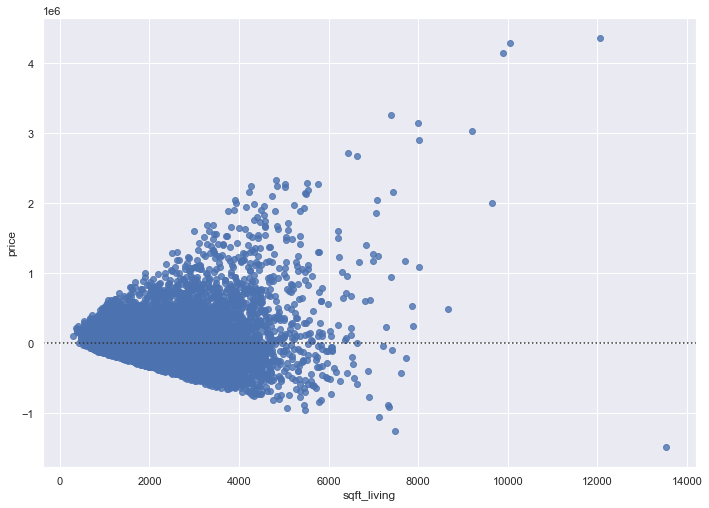

In [72]:
sns.residplot(x = "sqft_living",y = "price",data = df)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

Text(0.5, 0, 'sqft_living')

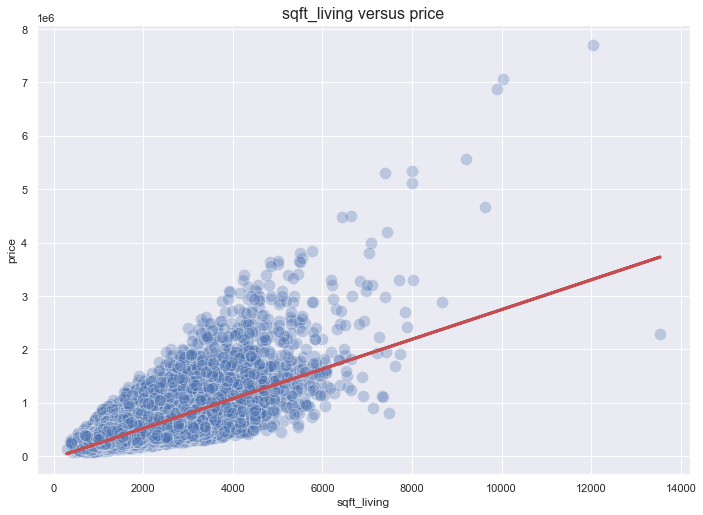

In [74]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sns.scatterplot(x = "sqft_living", y = "price", data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df["sqft_living"], slr_slope*df["sqft_living"] + slr_intercept, color = 'r', linewidth = 3)
plt.title("sqft_living versus price", fontsize = 16)
plt.ylabel("price", fontsize = 12)
plt.xlabel("sqft_living", fontsize = 12)

In [75]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.48889929019453016


In [76]:
!pip install termcolor
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [77]:
print(cl(slr_reg.summary(),attrs = ["bold"]))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.126e+05
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:51:53   Log-Likelihood:                     -3.0032e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21612   BIC:                                  6.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## MLR Model

In [78]:
X1_var = df[["sqft_living","grade","sqft_above","sqft_living15"]]
y_var = df["price"] # dependent variable

In [79]:
model = linear_model.LinearRegression()

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
model.intercept_

-37893.59850106703

In [82]:
model.coef_

array([278.32860644])

In [83]:
model.score(X_train, y_train)

0.49453356717789776

In [84]:
model.score(X_train, model.predict(X_train))

1.0

In [85]:
model.score(X_test, y_test)

0.48889929019453016

F:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


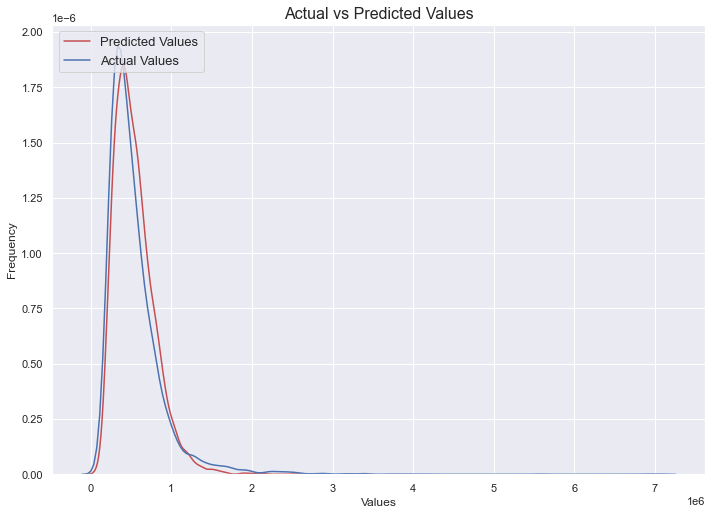

In [86]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [87]:
## This distribution plot reveals that our prediction values have performed almost precisely to our actual values but there are some outliers that can be noticed. This is because we have built a very basic model on Linear Regression to precisely predict the outcomes.

In [88]:
## Check assumptions of LR

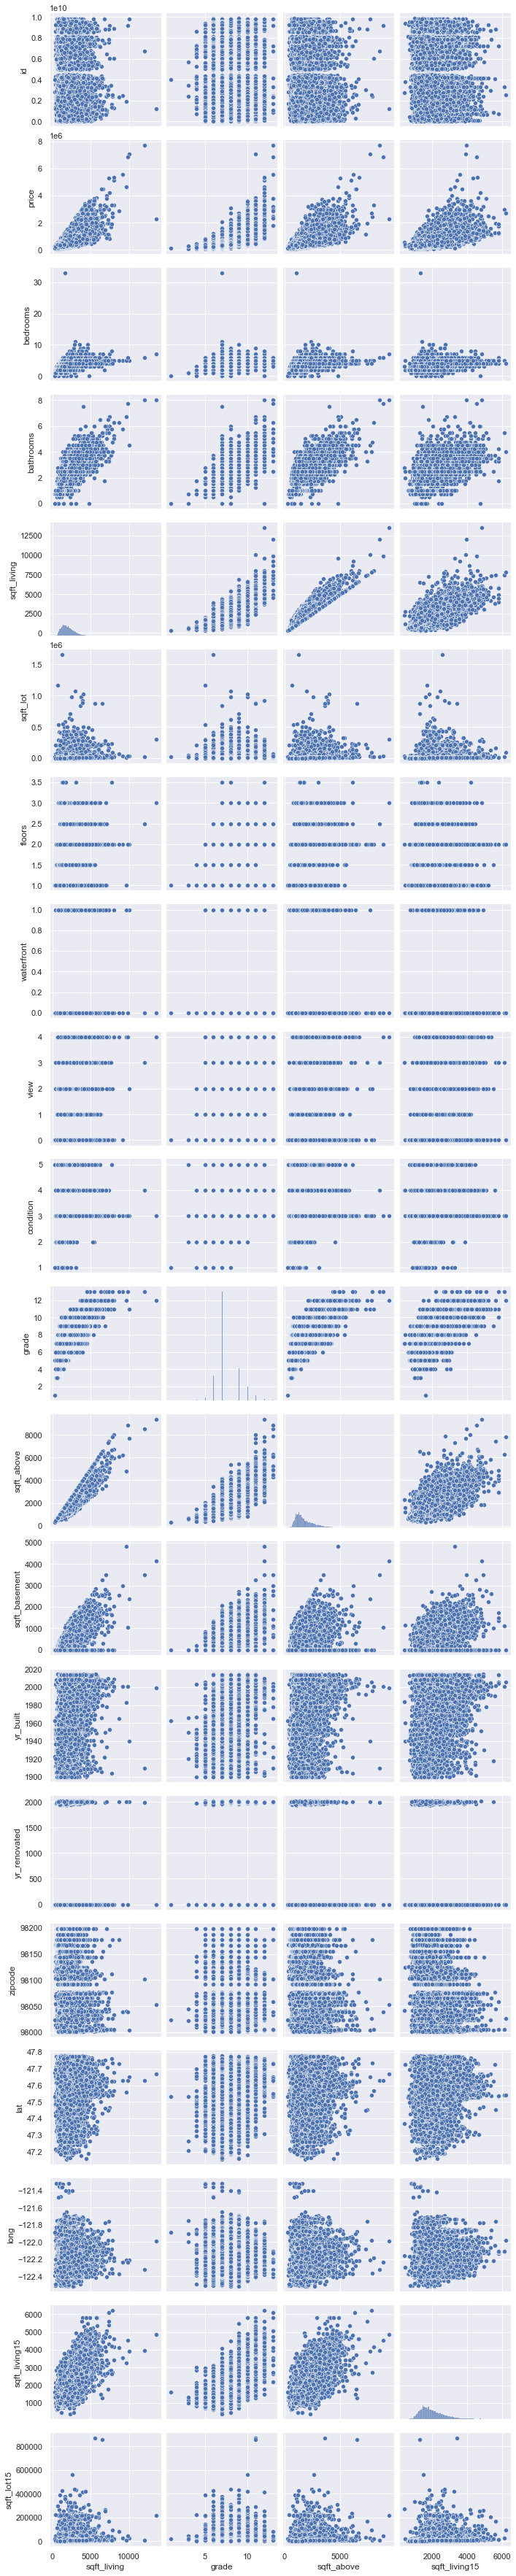

In [89]:
sns.pairplot(df,x_vars=["sqft_living","grade","sqft_above","sqft_living15"])

In [90]:
## using statsmodels

In [91]:
model = sm.OLS(y_train,X_train).fit()

In [92]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                          7.989e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:52:16   Log-Likelihood:                     -2.1013e+05
No. Observations:               15129   AIC:                                  4.203e+05
Df Residuals:                   15128   BIC:                                  4.203e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------